In [1]:
# Read in the data from the data folder
import pandas as pd

trafic = pd.read_csv('EventualStop_final.csv')
trafic.head()

,type,rcvTime,sendTime,sender,senderPseudo,messageID,file_name,density_level,pos_x,pos_y,...,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z,attack?,receiver_id
0,3,50857.177326,50857.177326,993.0,109935.0,1873819.0,traceJSON-1005-1003-A0-50857-14,2,264.933986,52.281289,...,0.000248,0.0,-0.102790,0.994703,0.0,19.250251,19.250251,0.0,1,1005
1,3,50857.634317,50857.634317,981.0,109815.0,1874450.0,traceJSON-1005-1003-A0-50857-14,2,247.057401,208.945033,...,0.000234,0.0,-0.119492,0.992835,0.0,4.931073,2.924896,0.0,0,1005
2,3,50857.833874,50857.833874,987.0,109875.0,1874793.0,traceJSON-1005-1003-A0-50857-14,2,252.853802,220.701135,...,0.001675,0.0,0.764222,0.644953,0.0,0.797183,0.863475,0.0,0,1005
3,3,50858.177329,50858.177329,993.0,109935.0,1875517.0,traceJSON-1005-1003-A0-50857-14,2,264.933986,52.281289,...,0.000248,0.0,-0.102790,0.994703,0.0,19.250251,19.250251,0.0,1,1005
4,3,50858.634320,50858.634320,981.0,109815.0,1875983.0,traceJSON-1005-1003-A0-50857-14,2,247.004712,212.853018,...,0.000463,0.0,0.012132,0.999926,0.0,4.640047,2.978840,0.0,0,1005


In [3]:
# Check the number of rows and columns in the data
trafic.shape

(569173, 34)

In [4]:
trafic.dtypes

type               int64
rcvTime          float64
sendTime         float64
sender             int64
senderPseudo       int64
messageID          int64
file_name         object
density_level      int64
pos_x            float64
pos_y            float64
pos_z              int64
pos_noise_x      float64
pos_noise_y      float64
pos_noise_z        int64
spd_x            float64
spd_y            float64
spd_z              int64
spd_noise_x      float64
spd_noise_y      float64
spd_noise_z        int64
acl_x            float64
acl_y            float64
acl_z              int64
acl_noise_x      float64
acl_noise_y      float64
acl_noise_z        int64
hed_x            float64
hed_y            float64
hed_z              int64
hed_noise_x      float64
hed_noise_y      float64
hed_noise_z        int64
attack?            int64
receiver_id        int64
dtype: object

In [5]:
trafic['attack?'].value_counts()

0    394113
1    175060
Name: attack?, dtype: int64

In [5]:
#drop the unrelated 
dropList = ['file_name', 'pos_z', 'pos_noise_z','spd_z','spd_noise_z','acl_z','acl_noise_z','hed_z','hed_noise_z','type','density_level','messageID']
trafic.drop(dropList, axis=1, inplace=True)

In [6]:
trafic.head()

,rcvTime,sendTime,sender,senderPseudo,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,...,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?,receiver_id
0,50857.17733,50857.17733,993,109935,281.769917,227.927871,4.984902,5.023655,33.415205,30.170258,...,1.397378,0.440297,0.001009,0.000352,0.977598,0.210479,4.434205,10.510045,1,1005
1,50857.63432,50857.63432,981,109815,247.419118,208.810634,4.282865,4.404056,-0.659953,4.563023,...,0.481706,-3.326252,0.000113,0.000779,-0.108613,0.994084,9.800286,5.813100,0,1005
2,50857.83387,50857.83387,987,109875,252.738569,220.596143,3.821638,4.222652,5.968641,5.169837,...,1.418791,1.228929,0.002660,0.005043,0.763592,0.645699,1.353133,1.465656,0,1005
3,50858.17733,50858.17733,993,109935,295.152640,232.162975,4.845972,5.029533,22.139487,33.697176,...,0.063902,0.020153,0.000676,0.001065,0.976608,0.215027,4.002935,10.176616,1,1005
4,50858.63432,50858.63432,981,109815,247.454594,212.716676,4.324072,4.354478,-0.051640,4.380265,...,-0.031001,2.599866,0.000223,0.001543,0.024138,0.999709,9.221886,5.920312,0,1005


In [7]:
#look at the general distribution of data
trafic.describe()

,rcvTime,sendTime,sender,senderPseudo,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,...,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?,receiver_id
count,820097.000000,820097.000000,820097.000000,8.200970e+05,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,...,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000
mean,53361.914965,53361.914965,4668.517516,9.986460e+05,466.011572,647.112958,3.981572,3.982077,5.547689,6.187476,...,-0.000463,-0.023151,0.000690,0.000920,-0.103275,0.045662,13.459450,13.229165,0.302474,4668.531124
std,2030.832066,2030.832066,2755.659176,6.343362e+05,378.459807,285.773412,0.592450,0.593290,12.775267,12.901599,...,0.882635,1.115253,0.002147,0.002338,0.621870,0.774938,13.510433,14.404316,0.459330,2755.658671
min,50408.529000,50408.529000,9.000000,1.095000e+03,24.766663,24.326072,2.594239,2.643171,-17.785412,-17.710804,...,-4.499492,-4.499033,0.000000,0.000000,-1.000000,-1.000000,0.002611,0.001954,0.000000,9.000000
25%,51862.155520,51862.155520,2565.000000,1.025655e+06,183.272752,393.486395,3.485201,3.485365,-1.800717,-1.701154,...,-0.172973,-0.275023,0.000005,0.000007,-0.709201,-0.834335,4.338502,3.594607,0.000000,2565.000000
50%,52837.830350,52837.830350,4371.000000,1.043715e+06,248.002637,689.902398,3.940988,3.942313,0.933287,3.426825,...,0.000058,0.000062,0.000069,0.000081,-0.032873,0.066671,9.897577,8.496387,0.000000,4371.000000
75%,54913.953800,54913.953800,6903.000000,1.069035e+06,777.096485,892.421001,4.478691,4.480273,12.332276,13.103908,...,0.160260,0.267119,0.000446,0.000825,0.109542,0.987699,17.352106,17.355091,1.000000,6903.000000
max,57599.923720,57599.923720,10113.000000,1.010114e+07,1395.678029,1359.689656,5.647523,5.670833,39.999512,39.999465,...,4.502048,4.500039,0.104691,0.090515,1.000000,1.000000,102.702662,111.442550,1.000000,10113.000000


In [8]:
#look at the correlation 
trafic.corr()

,rcvTime,sendTime,sender,senderPseudo,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,...,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?,receiver_id
rcvTime,1.000000,1.000000,0.991190,0.332384,-0.015587,-0.054683,0.038378,0.039459,-0.014538,-0.009017,...,-0.001310,0.001111,0.020478,0.018776,-0.009845,0.001801,0.027380,-0.006338,-0.010611,0.991190
sendTime,1.000000,1.000000,0.991190,0.332384,-0.015587,-0.054683,0.038378,0.039459,-0.014538,-0.009017,...,-0.001310,0.001111,0.020478,0.018776,-0.009845,0.001801,0.027380,-0.006338,-0.010611,0.991190
sender,0.991190,0.991190,1.000000,0.353547,-0.020185,-0.057353,0.039098,0.039909,-0.013244,-0.007668,...,-0.001814,0.000598,0.019202,0.020119,-0.008317,-0.000165,0.027883,-0.002558,-0.009724,0.999068
senderPseudo,0.332384,0.332384,0.353547,1.000000,-0.028133,-0.027090,-0.002989,-0.005071,-0.010469,-0.013852,...,-0.002754,0.001391,-0.003006,0.004633,-0.010889,-0.036897,0.021000,0.025646,-0.006300,0.352187
pos_x,-0.015587,-0.015587,-0.020185,-0.028133,1.000000,0.372712,0.017424,0.017511,-0.034874,-0.059011,...,-0.082861,-0.030646,0.114110,0.052204,-0.053188,-0.093166,0.161051,0.013834,-0.021604,-0.020237
pos_y,-0.054683,-0.054683,-0.057353,-0.027090,0.372712,1.000000,0.020813,0.021340,-0.016143,-0.065627,...,-0.012133,-0.149201,0.039759,0.034677,-0.019387,-0.203621,0.009058,0.057393,-0.012763,-0.057089
pos_noise_x,0.038378,0.038378,0.039098,-0.002989,0.017424,0.020813,1.000000,0.945404,0.043756,0.040612,...,0.001932,0.000094,0.001733,0.004203,0.008398,0.022541,0.017668,-0.012171,0.041694,0.039767
pos_noise_y,0.039459,0.039459,0.039909,-0.005071,0.017511,0.021340,0.945404,1.000000,0.045446,0.042481,...,0.001467,0.000474,0.002079,0.005533,0.010221,0.023620,0.014100,-0.016081,0.043448,0.040526
spd_x,-0.014538,-0.014538,-0.013244,-0.010469,-0.034874,-0.016143,0.043756,0.045446,1.000000,0.557123,...,0.013781,0.004886,-0.022170,-0.015415,0.333063,0.032356,-0.252394,-0.039527,0.739149,-0.012649
spd_y,-0.009017,-0.009017,-0.007668,-0.013852,-0.059011,-0.065627,0.040612,0.042481,0.557123,1.000000,...,0.007823,0.010983,-0.017397,-0.011559,0.093255,0.370627,-0.060225,-0.310504,0.701074,-0.006870


In [9]:

from scipy import stats
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(trafic.groupby('attack?')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    attack = trafic[trafic['attack?']==1][feature]
    not_attack = trafic[trafic['attack?']==0][feature]
    tstat, pval = stats.ttest_ind(attack, not_attack, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [10]:

related_features = trafic.columns
for feature in related_features:
    describe_cont_feature(feature)


*** Results for rcvTime ***
            count          mean          std          min          25%  \
attack?                                                                  
0        572039.0  53376.105132  2033.206547  50408.52900  51863.97507   
1        248058.0  53329.191452  2024.970799  50410.62368  51857.38698   

                 50%          75%          max  
attack?                                         
0        52844.64833  54951.18482  57599.92372  
1        52823.59272  54868.02315  57599.80607  
t-statistic: -9.6, p-value: 6.3e-22
None

*** Results for sendTime ***
            count          mean          std          min          25%  \
attack?                                                                  
0        572039.0  53376.105132  2033.206547  50408.52900  51863.97507   
1        248058.0  53329.191452  2024.970799  50410.62368  51857.38698   

                 50%          75%          max  
attack?                                         
0        528

t-statistic: 31.6, p-value: 4.58e-219
None

*** Results for hed_noise_x ***
            count       mean        std       min       25%        50%  \
attack?                                                                  
0        572039.0  13.581980  13.474375  0.002611  4.513619  10.085857   
1        248058.0  13.176886  13.589036  0.004279  3.944401   9.479598   

               75%         max  
attack?                         
0        17.390929  102.702662  
1        17.276253   97.768187  
t-statistic: -12.4, p-value: 1.78e-35
None

*** Results for hed_noise_y ***
            count       mean        std       min       25%       50%  \
attack?                                                                 
0        572039.0  13.453461  14.623681  0.001954  3.752754  8.825036   
1        248058.0  12.711921  13.871448  0.004810  3.326000  7.662906   

               75%         max  
attack?                         
0        17.256009  111.442550  
1        17.535767  103.757

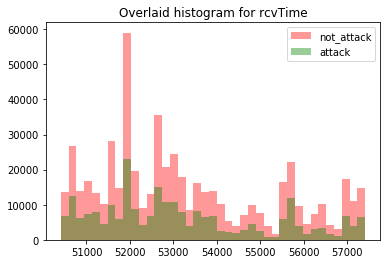

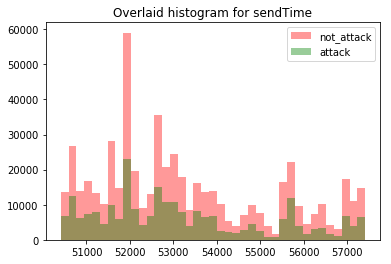

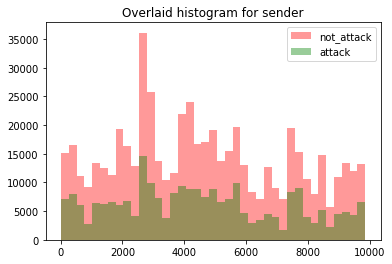

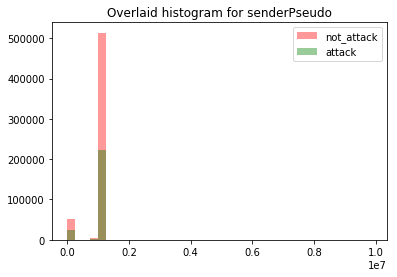

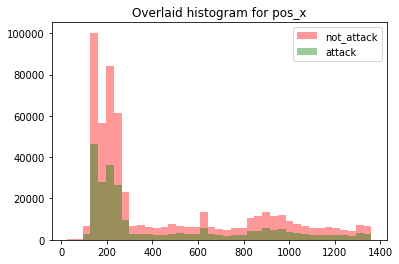

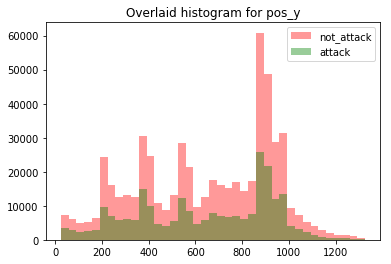

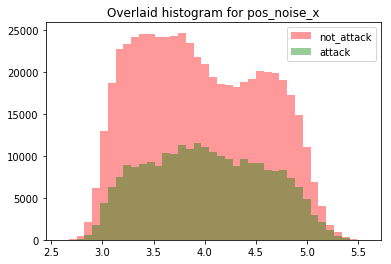

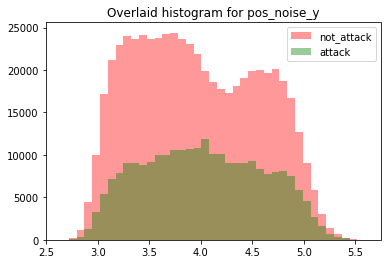

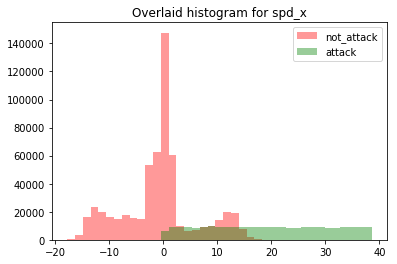

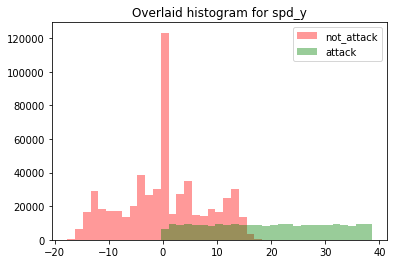

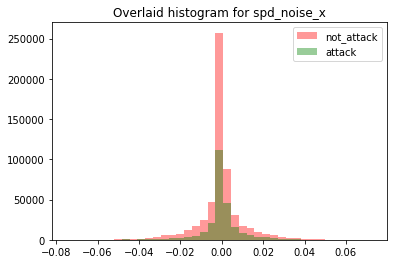

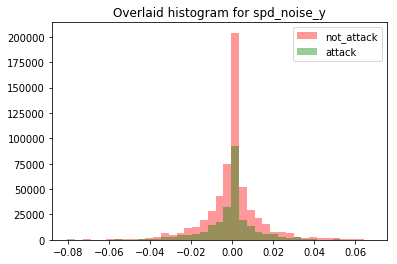

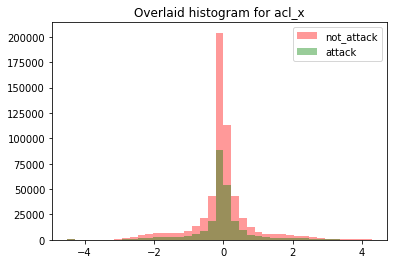

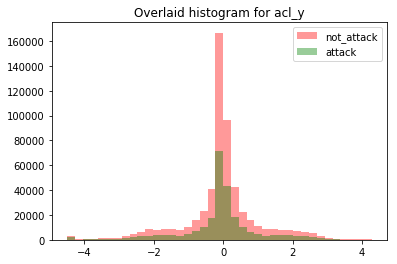

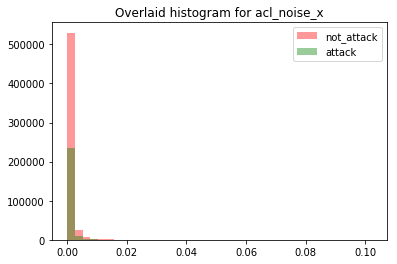

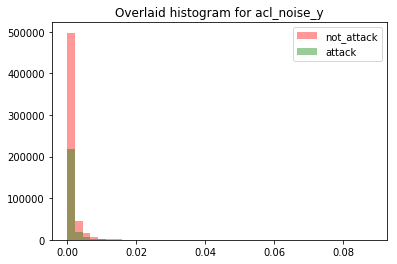

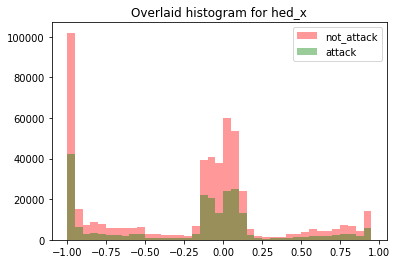

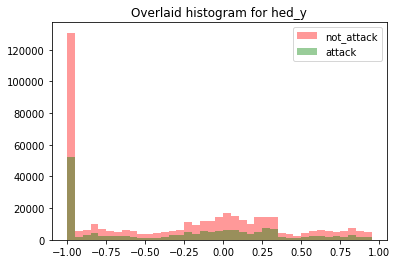

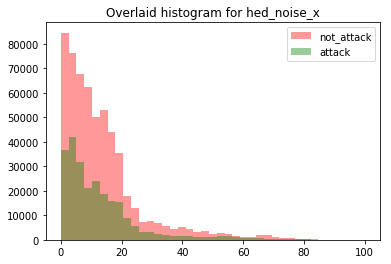

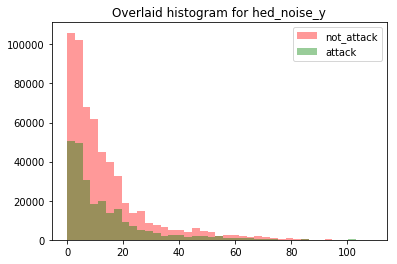

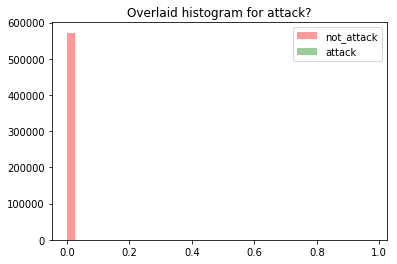

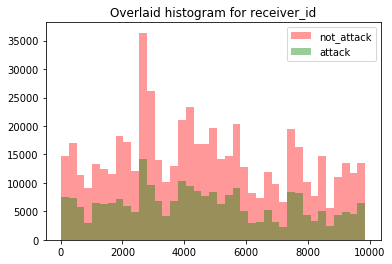

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

for i in related_features:
    attack = list(trafic[trafic['attack?'] == 0][i].dropna())
    not_attack = list(trafic[trafic['attack?'] == 1][i].dropna())
    xmin = min(min(attack), min(not_attack))
    xmax = max(max(attack), max(not_attack))
    width = (xmax - xmin) / 40
    sns.distplot(attack, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(not_attack, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['not_attack', 'attack'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()